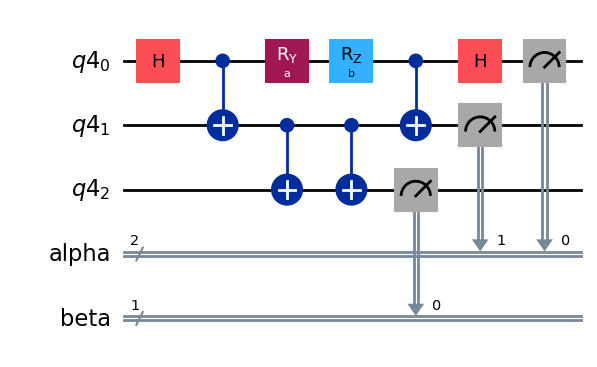

In [9]:
from qiskit.circuit import (
    Parameter, QuantumCircuit, ClassicalRegister, QuantumRegister
)
from qiskit.primitives import StatevectorSampler
 
import matplotlib.pyplot as plt
import numpy as np
 
# Define our circuit registers, including classical registers
# called 'alpha' and 'beta'.
qreg = QuantumRegister(3)
alpha = ClassicalRegister(2, "alpha")
beta = ClassicalRegister(1, "beta")
 
# Define a quantum circuit with two parameters.
circuit = QuantumCircuit(qreg, alpha, beta)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.ry(Parameter("a"), 0)
circuit.rz(Parameter("b"), 0)
circuit.cx(1, 2)
circuit.cx(0, 1)
circuit.h(0)
circuit.measure([0, 1], alpha)
circuit.measure([2], beta)
circuit.draw('mpl')


In [10]:
# Define a sweep over parameter values, where the second axis is over.
# the two parameters in the circuit.
params = np.vstack([
    np.linspace(-np.pi, np.pi, 100),
    np.linspace(-4 * np.pi, 4 * np.pi, 100)
]).T
 
# Instantiate a new statevector simulation based sampler object.
sampler = StatevectorSampler()
 
# Start a job that will return shots for all 100 parameter value sets.
pub = (circuit, params)
job = sampler.run([pub], shots=256)
 
# Extract the result for the 0th pub (this example only has one pub).
result = job.result()[0]
 
# There is one BitArray object for each ClassicalRegister in the
# circuit. Here, we can see that the BitArray for alpha contains data
# for all 100 sweep points, and that it is indeed storing data for 2
# bits over 256 shots.
assert result.data.alpha.shape == (100,)
assert result.data.alpha.num_bits == 2
assert result.data.alpha.num_shots == 256
 
# We can work directly with a binary array in performant applications.
raw = result.data.alpha.array
 
# For small registers where it is anticipated to have many counts
# associated with the same bitstrings, we can turn the data from,
# for example, the 22nd sweep index into a dictionary of counts.
counts = result.data.alpha.get_counts(22)
 
# Or, convert into a list of bitstrings that preserve shot order.
bitstrings = result.data.alpha.get_bitstrings(22)
print(bitstrings)

['10', '11', '00', '11', '11', '11', '01', '11', '00', '11', '11', '11', '11', '00', '10', '00', '00', '11', '11', '11', '00', '00', '00', '11', '01', '00', '01', '00', '11', '00', '11', '00', '11', '00', '10', '11', '11', '10', '11', '00', '11', '10', '11', '01', '00', '00', '00', '00', '11', '00', '11', '11', '01', '00', '11', '00', '11', '11', '00', '11', '00', '10', '00', '11', '11', '11', '11', '01', '11', '01', '11', '00', '00', '11', '00', '11', '11', '00', '11', '11', '11', '11', '11', '11', '11', '11', '10', '11', '11', '11', '11', '11', '11', '10', '11', '11', '00', '00', '00', '01', '10', '00', '11', '11', '00', '11', '10', '11', '11', '11', '11', '11', '00', '11', '11', '11', '11', '00', '11', '00', '11', '00', '01', '11', '11', '10', '10', '00', '11', '11', '11', '01', '11', '11', '11', '00', '00', '11', '00', '10', '11', '11', '11', '00', '00', '11', '11', '00', '11', '11', '11', '11', '00', '10', '10', '11', '11', '01', '00', '00', '11', '00', '01', '00', '11', '01', '00